# <center><span style="color:DarkBlue">Modeling</span></center> <a class="tocSkip">

## 변수 설명
\**일차적으로 다음의 변수들은 모델링에 사용하지 않기로 함.*

- ~LoanNr_ChkDgt : 식별 키~
- ~Name : 차용 기업명(Borrower)~
- ~City : 차용 기업이 위치한 도시~
- ~State : 차용 기업이 위치한 주~
- ~Zip : 차용 기업의 우편 번호~
- ~Bank : 은행 이름~
- ~BankState : 은행이 위치한 주~
- NAICS : 북미 산업 분류 체계 코드
- ~ApprovalDate : SBA 약정 발행 날짜~
- ~ApprovalFY : 약정 회계 연도~
- ~Term : 대출 기간(개월)~
- NoEmp : 직원 수
- NewExist : 0 = 기존 비즈니스, 1 = 신규 비즈니스
- ~CreateJob : 신규 직원 수~
- ~RetainedJob : 기존 직원 수~
- FranchiseCode	: 0=프랜차이즈 아님, 1=프랜차이즈
- UrbanRural : 0 = 도시, 1 = 농촌
- LowDoc : SBA 대출프로그램 신청 여부(0=아니오, 1 = 예)
- ~ChgOffDate : 채무 불이행으로 선언되는 날짜~
- ~DisbursementDate : 대금 지급일~
- ~DisbursementGross : 지급된 금액~
- `MIS_Status` : 채무불이행 여부 (0=채무이행, 1=채무불이행)
- ~ChgOffPrinGr : 청구된 금액~
- GrAppv : 은행에서 승인한 대출 금액
- SBA_Appv : SBA의 승인된 대출 보증 금액
- SameState : 기업이 위치한 State과 은행이 위치한 State이 동일한지 여부(0=동일하지 않음, 1=동일함)
- Recession : SBA 약정 발행 날짜가 글로벌 금융위기 시기에 포함되는지 여부(0=포함되지 않음, 1=포함)
- ChgOffDate2 : 채무 불이행으로 선언되는 날짜(결측치 대체)
- Term_re : 대출 기간 범주형 변수 (0=5년 미만, 1=5년 이상 15년 미만, 2=15년 이상)
- smallmedium : 0=500명 미만(소기업), 1=500명 이상 1500명 이하(중기업)
- createjob2 : 신규 직원 수 파생변수 0= 0 ~ 3인, 1= 4 ~ 20인, 2=21인 이상
- retainedjob2 : 기존 직원 수 파생변수 0= 0 ~ 3인, 1= 4 ~ 20인, 2=21인 이상
- dis_re : 0=1천만원 미만, 1=1천만원 이상 ~ 5천만원 미만, 2=5천만원 이상 ~ 1억 미만, 3=1억 이상 ~ 5억 미만, 4=5억 이상 ~ 10억 미만, 5=10억 이상
- appv_pct : SBA_Appv / GrAppv
- ~Year : 대금 지급일의 연도~
- ~Month : 대금 지급일의 달~
- ~DATE : 금리 데이터 날짜~
- DPRIME : 금리 데이터 대출 금리
- dprime2 : 0=저금리, 1=고금리(10% 이상)
- ~Density : 산업 밀도~
- ~Upper_Threshold : 성장 가능성 상~
- ~Lower_Threshold : 성장 가능성 하~
- ~Label : 성장 가능성 지표(1,2,3)~
- growth_potential : 성장 가능성

## 라이브러리 불러오기

In [84]:
#pip install --user tensorflow

  Using cached tensorflow-2.13.1-cp38-cp38-win_amd64.whl (1.9 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow-intel==2.13.1; platform_system == "Windows" (from tensorflow) (from versions: 0.0.1, 2.10.0.dev20220728, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0)
ERROR: No matching distribution found for tensorflow-intel==2.13.1; platform_system == "Windows" (from tensorflow)


In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from xgboost import XGBClassifier

#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

In [2]:
# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Window의 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

## 데이터 불러오기
EDA 및 전처리가 완료된 df_final3.csv 파일 불러옴

In [4]:
data = pd.read_csv('df_final3.csv')
df = data.copy() #원본 데이터

In [5]:
print(df.shape)
display(df.head())
display(df.tail())
print(df.info())

(864747, 44)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,Year,Month,DATE,DPRIME,dprime2,Density,Upper_Threshold,Lower_Threshold,Label,growth_potential
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,17,1997-02-28,1997,...,1999,2,1999-02-01,7.75,0,0.172105,0.118196,0.055178,1,1
1,1000935004,Hairline Inc.,Vancouver,WA,98663,WELLS FARGO BANK NATL ASSOC,SD,14,1997-04-08,1997,...,1999,2,1999-02-01,7.75,0,0.090095,0.134566,0.055910,3,2
2,1003535008,Jason A. Philbrook,Rockland,ME,4841,KEYBANK NATIONAL ASSOCIATION,OH,18,1999-01-11,1999,...,1999,2,1999-02-01,7.75,0,0.041237,0.213874,0.051896,5,2
3,1009994000,"ARROW ENTERPRISE, INC.",BILLINGS,MT,59101,WESTERN SECURITY BANK,MT,5,1997-03-04,1997,...,1999,2,1999-02-01,7.75,0,0.148380,0.209033,0.057460,3,1
4,1011904005,"ROBIN E. JONES, D.D.S.",TACOMA,WA,98404,KEYBANK NATIONAL ASSOCIATION,OR,8,1997-03-05,1997,...,1999,2,1999-02-01,7.75,0,0.094218,0.134566,0.055910,3,2


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,Year,Month,DATE,DPRIME,dprime2,Density,Upper_Threshold,Lower_Threshold,Label,growth_potential
864742,9022713002,"BJORK, LAURA BEAUTY CONSULTANT",DALE CITY,VA,22193,MANUFACTURERS & TRADERS TR CO,MD,1,1996-02-21,1996,...,1996,2,1996-02-01,8.25,0,0.104331,0.139452,0.056099,3,1
864743,9035193000,"PROFESSIONALS FOR NONPROFITS,I",NEW YORK,NY,10022,BANCO POPULAR NORTH AMERICA,NY,10,1996-02-26,1996,...,1996,2,1996-02-01,8.25,0,0.094630,0.103363,0.066158,3,1
864744,9256453010,NORTHAIRE MARKET INC,SHAKOPEE,MN,55379,FIDELITY BANK,MN,20,1996-05-07,1996,...,1996,2,1996-02-01,8.25,0,0.066200,0.133574,0.063179,3,2
864745,9459933001,COMPUTER RENAISSANCE,CARY,NC,27511,FIRST-CITIZENS BK & TR CO,NC,17,1996-08-15,1996,...,1996,2,1996-02-01,8.25,0,0.187560,0.111641,0.060808,1,1
864746,7377094002,NORTHLAND DATACOMM CO,MINNEAPOLIS,MN,55311,BMO HARRIS BK NATL ASSOC,IL,20,2004-04-22,2004,...,2014,12,2014-12-01,3.25,0,0.066200,0.133574,0.063179,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864747 entries, 0 to 864746
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      864747 non-null  int64  
 1   Name               864747 non-null  object 
 2   City               864747 non-null  object 
 3   State              864747 non-null  object 
 4   Zip                864747 non-null  int64  
 5   Bank               864747 non-null  object 
 6   BankState          864747 non-null  object 
 7   NAICS              864747 non-null  int64  
 8   ApprovalDate       864747 non-null  object 
 9   ApprovalFY         864747 non-null  int64  
 10  Term               864747 non-null  int64  
 11  NoEmp              864747 non-null  int64  
 12  NewExist           864747 non-null  int64  
 13  CreateJob          864747 non-null  int64  
 14  RetainedJob        864747 non-null  int64  
 15  FranchiseCode      864747 non-null  int64  
 16  Ur

## 2차 전처리
- 변수 선택
- *범주형 데이터 수치화*
- train, valid, test 셋 분리
- 스케일링

## 1. 변수 선택

In [6]:
#필요없는 열은 제거
df = df.drop(["LoanNr_ChkDgt","Name","City","State","Zip","Bank","BankState","ApprovalDate","ApprovalFY","Term","CreateJob","RetainedJob","ChgOffDate","DisbursementDate","DisbursementGross","ChgOffPrinGr","ChgOffDate2","Year","Month","DATE","Density","Upper_Threshold","Lower_Threshold","Label"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864747 entries, 0 to 864746
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   NAICS             864747 non-null  int64  
 1   NoEmp             864747 non-null  int64  
 2   NewExist          864747 non-null  int64  
 3   FranchiseCode     864747 non-null  int64  
 4   UrbanRural        864747 non-null  int64  
 5   LowDoc            864747 non-null  int64  
 6   MIS_Status        864747 non-null  int64  
 7   GrAppv            864747 non-null  int64  
 8   SBA_Appv          864747 non-null  int64  
 9   SameState         864747 non-null  int64  
 10  Recession         864747 non-null  int64  
 11  Term_re           864747 non-null  int64  
 12  smallmedium       864747 non-null  int64  
 13  createjob2        864747 non-null  int64  
 14  retainedjob2      864747 non-null  int64  
 15  dis_re            864747 non-null  int64  
 16  appv_pct          86

## 2. train, valid, test 셋 분리

### 2.1 test 셋 만들기

In [7]:
# 시드 고정
seed = 42
df_sample = df.sample(n=1000, random_state=seed)

# 샘플 데이터 확인
print(df_sample.head())

# 필요하다면 test 데이터 프레임으로 할당
test = df_sample

        NAICS  NoEmp  NewExist  FranchiseCode  UrbanRural  LowDoc  MIS_Status  \
825107     13      4         0              0           0       0           0   
212849      8     16         0              0           0       0           0   
724805      3      1         1              0           1       0           0   
525131      1      7         1              0           1       0           0   
256633     10     52         0              0           0       0           0   

         GrAppv  SBA_Appv  SameState  Recession  Term_re  smallmedium  \
825107   306000    229500          1          0        2            0   
212849   517000    387750          1          0        2            0   
724805   338400    287640          0          0        1            0   
525131   175300    131475          1          0        1            0   
256633  1185000    749986          0          0        1            0   

        createjob2  retainedjob2  dis_re   appv_pct  DPRIME  dprime2  \
82

In [8]:
# test 데이터 구조 확인
print(test.shape)
display(test.head())
display(test.tail())
print(test.info())

(1000, 20)


,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,LowDoc,MIS_Status,GrAppv,SBA_Appv,SameState,Recession,Term_re,smallmedium,createjob2,retainedjob2,dis_re,appv_pct,DPRIME,dprime2,growth_potential
825107,13,4,0,0,0,0,0,306000,229500,1,0,2,0,0,0,3,75.000000,8.50,0,2
212849,8,16,0,0,0,0,0,517000,387750,1,0,2,0,0,0,4,75.000000,4.75,0,2
724805,3,1,1,0,1,0,0,338400,287640,0,0,1,0,0,0,3,85.000000,6.00,0,2
525131,1,7,1,0,1,0,0,175300,131475,1,0,1,0,1,0,3,75.000000,8.25,0,1
256633,10,52,0,0,0,0,0,1185000,749986,0,0,1,0,0,2,5,63.289958,8.50,0,1


,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,LowDoc,MIS_Status,GrAppv,SBA_Appv,SameState,Recession,Term_re,smallmedium,createjob2,retainedjob2,dis_re,appv_pct,DPRIME,dprime2,growth_potential
451582,1,40,1,0,1,0,0,70000,35000,0,0,0,0,0,2,2,50.0,4.00,0,1
613651,13,4,0,0,1,1,0,100000,80000,1,0,1,0,0,0,3,80.0,8.25,0,2
582361,2,3,0,0,1,0,0,45000,22500,1,0,1,0,0,1,2,50.0,3.61,0,2
277365,14,8,0,0,1,0,0,20000,10000,1,0,0,0,0,1,1,50.0,9.50,0,2
316959,4,1,1,0,0,0,0,79000,79000,0,0,2,0,2,0,2,100.0,8.50,0,2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 825107 to 316959
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAICS             1000 non-null   int64  
 1   NoEmp             1000 non-null   int64  
 2   NewExist          1000 non-null   int64  
 3   FranchiseCode     1000 non-null   int64  
 4   UrbanRural        1000 non-null   int64  
 5   LowDoc            1000 non-null   int64  
 6   MIS_Status        1000 non-null   int64  
 7   GrAppv            1000 non-null   int64  
 8   SBA_Appv          1000 non-null   int64  
 9   SameState         1000 non-null   int64  
 10  Recession         1000 non-null   int64  
 11  Term_re           1000 non-null   int64  
 12  smallmedium       1000 non-null   int64  
 13  createjob2        1000 non-null   int64  
 14  retainedjob2      1000 non-null   int64  
 15  dis_re            1000 non-null   int64  
 16  appv_pct          1000 non-null   f

In [9]:
# y_test에 MIS_Status 열 할당
y_test = test['MIS_Status']

# x_test에 MIS_Status를 제외한 열들 할당
x_test = test.drop('MIS_Status', axis=1)

# x_test 확인
print(x_test.head())

# y_test 확인
print(y_test.head())

        NAICS  NoEmp  NewExist  FranchiseCode  UrbanRural  LowDoc   GrAppv  \
825107     13      4         0              0           0       0   306000   
212849      8     16         0              0           0       0   517000   
724805      3      1         1              0           1       0   338400   
525131      1      7         1              0           1       0   175300   
256633     10     52         0              0           0       0  1185000   

        SBA_Appv  SameState  Recession  Term_re  smallmedium  createjob2  \
825107    229500          1          0        2            0           0   
212849    387750          1          0        2            0           0   
724805    287640          0          0        1            0           0   
525131    131475          1          0        1            0           1   
256633    749986          0          0        1            0           0   

        retainedjob2  dis_re   appv_pct  DPRIME  dprime2  growth_potential

## 2.2 샘플링
- 채무이행(0) : 채무불이행(1) = 5:5 비율로 샘플링하기

In [10]:
# 시드 고정
seed = 42
# df에서 test 데이터를 제외한 데이터를 추출
df_remaining = df.drop(test.index)

# MIS_Status가 0인 데이터와 1인 데이터로 분리
df_0 = df_remaining[df_remaining['MIS_Status'] == 0]
df_1 = df_remaining[df_remaining['MIS_Status'] == 1]

# 0과 1의 비율 계산
ratio_0 = len(df_0) / len(df_remaining)
ratio_1 = len(df_1) / len(df_remaining)

# 다운 샘플링할 데이터 개수 계산
total_samples = 9000
samples_0 = int(total_samples * 0.5)  # MIS_Status가 0인 샘플 개수
samples_1 = int(total_samples * 0.5)  # MIS_Status가 1인 샘플 개수

# 비율 조정을 위한 다운 샘플링
df_0_downsampled = df_0.sample(n=samples_0, random_state=seed)
df_1_downsampled = df_1.sample(n=samples_1, random_state=seed)

# 다운 샘플링된 데이터 합치기
df_downsampled = pd.concat([df_0_downsampled, df_1_downsampled])

# 결과 데이터프레임 확인
print(df_downsampled['MIS_Status'].value_counts())

# 최종 데이터프레임 할당
df_fin = df_downsampled
df_fin

1    4500
0    4500
Name: MIS_Status, dtype: int64


,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,LowDoc,MIS_Status,GrAppv,SBA_Appv,SameState,Recession,Term_re,smallmedium,createjob2,retainedjob2,dis_re,appv_pct,DPRIME,dprime2,growth_potential
222395,1,2,0,0,0,0,0,25000,12500,0,0,1,0,0,0,1,50.0,7.50,0,1
439185,1,5,0,0,0,0,0,60000,30000,1,0,0,0,0,1,2,50.0,4.00,0,1
273881,1,17,1,1,0,0,0,340000,255000,0,0,1,0,1,1,3,75.0,4.84,0,1
138058,8,8,0,0,1,1,0,125000,93750,1,0,1,0,0,0,3,75.0,9.50,0,2
470427,8,1,1,0,0,0,0,50000,25000,1,0,0,0,1,1,2,50.0,5.59,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371085,17,3,0,0,0,0,1,10000,5000,0,0,0,0,0,1,1,50.0,4.01,0,1
751654,5,87,0,0,1,0,1,280000,238000,1,0,0,0,0,0,3,85.0,6.00,0,1
601567,2,4,0,0,1,0,1,25000,12500,0,0,0,0,0,1,2,50.0,4.75,0,2
537593,14,1,1,0,1,0,1,20000,10000,1,0,0,0,0,0,1,50.0,7.74,0,2


### train, valid 데이터셋 만들기

In [11]:
# train 데이터와 valid 데이터를 분할
df_train, df_valid = train_test_split(df_fin, train_size=7000, test_size=2000, random_state=42)

# 결과 확인
print("Train 데이터 비율:")
print(df_train['MIS_Status'].value_counts(normalize=True))
print("\nValid 데이터 비율:")
print(df_valid['MIS_Status'].value_counts(normalize=True))

Train 데이터 비율:
0    0.502286
1    0.497714
Name: MIS_Status, dtype: float64

Valid 데이터 비율:
1    0.508
0    0.492
Name: MIS_Status, dtype: float64


In [12]:
# df_train 분리
y_train = df_train['MIS_Status']
x_train = df_train.drop('MIS_Status', axis=1)

# x_train, y_train 확인
print(x_train.head())
print(y_train.head())

        NAICS  NoEmp  NewExist  FranchiseCode  UrbanRural  LowDoc  GrAppv  \
479937     20      1         0              0           0       0  100000   
699666     17      1         0              0           1       0   26000   
67684      10      5         0              0           0       0   50000   
411530     17      2         0              0           0       0    6000   
202436      8      4         0              0           0       0  125500   

        SBA_Appv  SameState  Recession  Term_re  smallmedium  createjob2  \
479937     50000          1          0        1            0           0   
699666     23400          1          0        1            0           0   
67684      25000          1          0        0            0           0   
411530      5100          0          0        0            0           0   
202436     62750          0          0        1            0           0   

        retainedjob2  dis_re  appv_pct  DPRIME  dprime2  growth_potential  
4799

In [13]:
# df_valid 분리
y_valid = df_valid['MIS_Status']
x_valid = df_valid.drop('MIS_Status', axis=1)

# x_valid, y_valid 확인
print(x_valid.head())
print(y_valid.head())

        NAICS  NoEmp  NewExist  FranchiseCode  UrbanRural  LowDoc  GrAppv  \
313128     14      3         0              0           0       1   50000   
398709      8      6         0              0           0       0   40000   
48061       8      1         1              0           0       0  500000   
717593     16     14         0              0           1       0  445000   
93573      20      3         0              0           1       0  100000   

        SBA_Appv  SameState  Recession  Term_re  smallmedium  createjob2  \
313128     42500          0          0        0            0           0   
398709     20000          0          0        1            0           0   
48061     375000          1          0        1            0           0   
717593    378250          1          0        1            0           0   
93573      50000          0          0        0            0           0   

        retainedjob2  dis_re  appv_pct  DPRIME  dprime2  growth_potential  
3131

## 3. 변수 스케일링

(1) Standard Scaler

In [14]:
# 스케일러 초기화
scaler = StandardScaler()

# Train 데이터 스케일링
x_train = scaler.fit_transform(x_train)

# Valid 데이터 스케일링
x_valid = scaler.transform(x_valid)

# Test 데이터 스케일링
x_test = scaler.transform(x_test)

# 결과 확인
print("Train 데이터 스케일링 후 통계 정보:")
print(pd.DataFrame(x_train).describe())

Train 데이터 스케일링 후 통계 정보:
                 0             1             2             3             4   \
count  7.000000e+03  7.000000e+03  7.000000e+03  7.000000e+03  7.000000e+03   
mean  -2.100701e-16 -3.264373e-16  2.244554e-16  3.076943e-16 -3.976502e-16   
std    1.000071e+00  1.000071e+00  1.000071e+00  1.000071e+00  1.000071e+00   
min   -1.629067e+00 -3.253877e-01 -6.326769e-01 -2.325040e-01 -9.298805e-01   
25%   -9.702496e-01 -2.867889e-01 -6.326769e-01 -2.325040e-01 -9.298805e-01   
50%    3.473849e-01 -2.095914e-01 -6.326769e-01 -2.325040e-01 -9.298805e-01   
75%    1.006202e+00 -1.659748e-02  1.580586e+00 -2.325040e-01  1.075407e+00   
max    1.500315e+00  3.823479e+01  1.580586e+00  4.301001e+00  1.075407e+00   

                 5             6             7             8             9   \
count  7.000000e+03  7.000000e+03  7.000000e+03  7.000000e+03  7.000000e+03   
mean  -1.158280e-16  5.443265e-17  1.140833e-16 -2.028536e-17  7.743726e-16   
std    1.000071e+00  1.0000

(2) MinMax Scaler

In [15]:
#객체 생성
mms = MinMaxScaler()

# Train 데이터 스케일링
x_train = mms.fit_transform(x_train)

# Valid 데이터 스케일링
x_valid = mms.transform(x_valid)

# Test 데이터 스케일링
x_test = mms.transform(x_test)

# 결과 확인
print("Train 데이터 스케일링 후 통계 정보:")
print(pd.DataFrame(x_train).describe())

Train 데이터 스케일링 후 통계 정보:
                0            1            2            3            4   \
count  7000.000000  7000.000000  7000.000000  7000.000000  7000.000000   
mean      0.520571     0.008438     0.285857     0.051286     0.463714   
std       0.319575     0.025935     0.451854     0.220596     0.498717   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.210526     0.001001     0.000000     0.000000     0.000000   
50%       0.631579     0.003003     0.000000     0.000000     0.000000   
75%       0.842105     0.008008     1.000000     0.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                5            6            7            8            9   \
count  7000.000000  7000.000000  7000.000000  7000.000000  7000.000000   
mean      0.108571     0.049867     0.038159     0.439857     0.051714   
std       0.311123     0.082117     0.066665     0.496405     0.221465   
min       0.0

(3) MaxAbs Scaler

In [16]:
#객체 생성
mas = MaxAbsScaler()

# Train 데이터 스케일링
x_train = mas.fit_transform(x_train)

# Valid 데이터 스케일링
x_valid = mas.transform(x_valid)

# Test 데이터 스케일링
x_test = mas.transform(x_test)

# 결과 확인
print("Train 데이터 스케일링 후 통계 정보:")
print(pd.DataFrame(x_train).describe())

Train 데이터 스케일링 후 통계 정보:
                0            1            2            3            4   \
count  7000.000000  7000.000000  7000.000000  7000.000000  7000.000000   
mean      0.520571     0.008438     0.285857     0.051286     0.463714   
std       0.319575     0.025935     0.451854     0.220596     0.498717   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.210526     0.001001     0.000000     0.000000     0.000000   
50%       0.631579     0.003003     0.000000     0.000000     0.000000   
75%       0.842105     0.008008     1.000000     0.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                5            6            7            8            9   \
count  7000.000000  7000.000000  7000.000000  7000.000000  7000.000000   
mean      0.108571     0.049867     0.038159     0.439857     0.051714   
std       0.311123     0.082117     0.066665     0.496405     0.221465   
min       0.0

(4) Robust Scaler

In [17]:
#객체 생성
rs = RobustScaler()

# Train 데이터 스케일링
x_train = rs.fit_transform(x_train)

# Valid 데이터 스케일링
x_valid = rs.transform(x_valid)

# Test 데이터 스케일링
x_test = rs.transform(x_test)

# 결과 확인
print("Train 데이터 스케일링 후 통계 정보:")
print(pd.DataFrame(x_train).describe())

Train 데이터 스케일링 후 통계 정보:
                0            1            2            3            4   \
count  7000.000000  7000.000000  7000.000000  7000.000000  7000.000000   
mean     -0.175762     0.775714     0.285857     0.051286     0.463714   
std       0.505993     3.701344     0.451854     0.220596     0.498717   
min      -1.000000    -0.428571     0.000000     0.000000     0.000000   
25%      -0.666667    -0.285714     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.333333     0.714286     1.000000     0.000000     1.000000   
max       0.583333   142.285714     1.000000     1.000000     1.000000   

                5            6            7            8            9   \
count  7000.000000  7000.000000  7000.000000  7000.000000  7000.000000   
mean      0.108571     0.753070     0.732776     0.439857     0.051714   
std       0.311123     1.924242     1.906021     0.496405     0.221465   
min       0.0

## 모델링
- 로지스틱 회귀
- 랜덤포레스트
- **서포트 벡터 머신(SVM)**

## 1. 로지스틱 회귀

### 1.1 기본 모델

In [39]:
# 모델 선언
lg_model = LogisticRegression(random_state=42)

In [40]:
# 모델 학습
lg_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [16]:
# 모델 평가
def model_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])
    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))
    print(classification_report(y_test, y_pred, labels=[True, False]))

In [41]:
pred=lg_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[603 413]
 [351 633]]

정확도: 0.6180
정밀도: 0.6321
재현율: 0.5935
F1: 0.6122
              precision    recall  f1-score   support

        True       0.63      0.59      0.61      1016
       False       0.61      0.64      0.62       984

    accuracy                           0.62      2000
   macro avg       0.62      0.62      0.62      2000
weighted avg       0.62      0.62      0.62      2000



## 1.2 하이퍼파라미터 튜닝

Grid Search는 너무 오래 걸리므로, Manual Search 진행

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],        # 규제 강도를 조절하는 역수. 클수록 약한 규제.
    'penalty': ['l1', 'l2'],                    # 규제 유형. 'l1'은 L1 규제, 'l2'는 L2 규제.
    'solver': ['liblinear', 'saga'],            # 최적화에 사용할 알고리즘.
    'max_iter': [100, 200, 300]                 # 최대 반복 횟수.
}

In [51]:
#모델 정의
ms_model = LogisticRegression(random_state=42, C=10, penalty='l1', solver='saga', max_iter=300)

# 모델 학습
ms_model.fit(x_train, y_train)

# 모델 평가
pred = ms_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[603 413]
 [351 633]]

정확도: 0.6180
정밀도: 0.6321
재현율: 0.5935
F1: 0.6122
              precision    recall  f1-score   support

        True       0.63      0.59      0.61      1016
       False       0.61      0.64      0.62       984

    accuracy                           0.62      2000
   macro avg       0.62      0.62      0.62      2000
weighted avg       0.62      0.62      0.62      2000



## 2. 랜덤 포레스트(Random Forest)

### 2.1 기본 모델

In [14]:
# 모델 선언
rf_model = RandomForestClassifier(random_state=42)

In [15]:
# 모델 학습
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
pred=rf_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[734 282]
 [184 800]]

정확도: 0.7670
정밀도: 0.7996
재현율: 0.7224
F1: 0.7590
              precision    recall  f1-score   support

        True       0.80      0.72      0.76      1016
       False       0.74      0.81      0.77       984

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000



### 2.2 하이퍼파라미터 튜닝

Grid Search는 너무 오래 걸리므로, Manual Search 진행

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],  # 트리의 개수
    'max_depth': [None, 10, 20, 30],   # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],   # 내부 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4]      # 리프 노드에 필요한 최소 샘플 수
}

In [19]:
#모델 정의
ms_model = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=2)

# 모델 학습
ms_model.fit(x_train, y_train)

# 모델 평가
pred = ms_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[731 285]
 [165 819]]

정확도: 0.7750
정밀도: 0.8158
재현율: 0.7195
F1: 0.7646
              precision    recall  f1-score   support

        True       0.82      0.72      0.76      1016
       False       0.74      0.83      0.78       984

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.77      2000
weighted avg       0.78      0.78      0.77      2000



In [20]:
#모델 정의
ms_model = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=4)

# 모델 학습
ms_model.fit(x_train, y_train)

# 모델 평가
pred = ms_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[734 282]
 [148 836]]

정확도: 0.7850
정밀도: 0.8322
재현율: 0.7224
F1: 0.7734
              precision    recall  f1-score   support

        True       0.83      0.72      0.77      1016
       False       0.75      0.85      0.80       984

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.78      2000
weighted avg       0.79      0.79      0.78      2000



In [24]:
#모델 정의
ms_model = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=20, min_samples_split=5, min_samples_leaf=4)

# 모델 학습
ms_model.fit(x_train, y_train)

# 모델 평가
pred = ms_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[744 272]
 [161 823]]

정확도: 0.7835
정밀도: 0.8221
재현율: 0.7323
F1: 0.7746
              precision    recall  f1-score   support

        True       0.82      0.73      0.77      1016
       False       0.75      0.84      0.79       984

    accuracy                           0.78      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.79      0.78      0.78      2000



In [33]:
#모델 정의
ms_model = RandomForestClassifier(random_state=42, n_estimators=150, max_depth=None, min_samples_split=2, min_samples_leaf=2)

# 모델 학습
ms_model.fit(x_train, y_train)

# 모델 평가
pred = ms_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[732 284]
 [164 820]]

정확도: 0.7760
정밀도: 0.8170
재현율: 0.7205
F1: 0.7657
              precision    recall  f1-score   support

        True       0.82      0.72      0.77      1016
       False       0.74      0.83      0.79       984

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000



In [34]:
#모델 정의
ms_model = RandomForestClassifier(random_state=42, n_estimators=150, max_depth=30, min_samples_split=5, min_samples_leaf=4)

# 모델 학습
ms_model.fit(x_train, y_train)

# 모델 평가
pred = ms_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[736 280]
 [148 836]]

정확도: 0.7860
정밀도: 0.8326
재현율: 0.7244
F1: 0.7747
              precision    recall  f1-score   support

        True       0.83      0.72      0.77      1016
       False       0.75      0.85      0.80       984

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000



=> 0.7747이 제일 높은 것으로 나타남.

### 2.3 변수 중요도

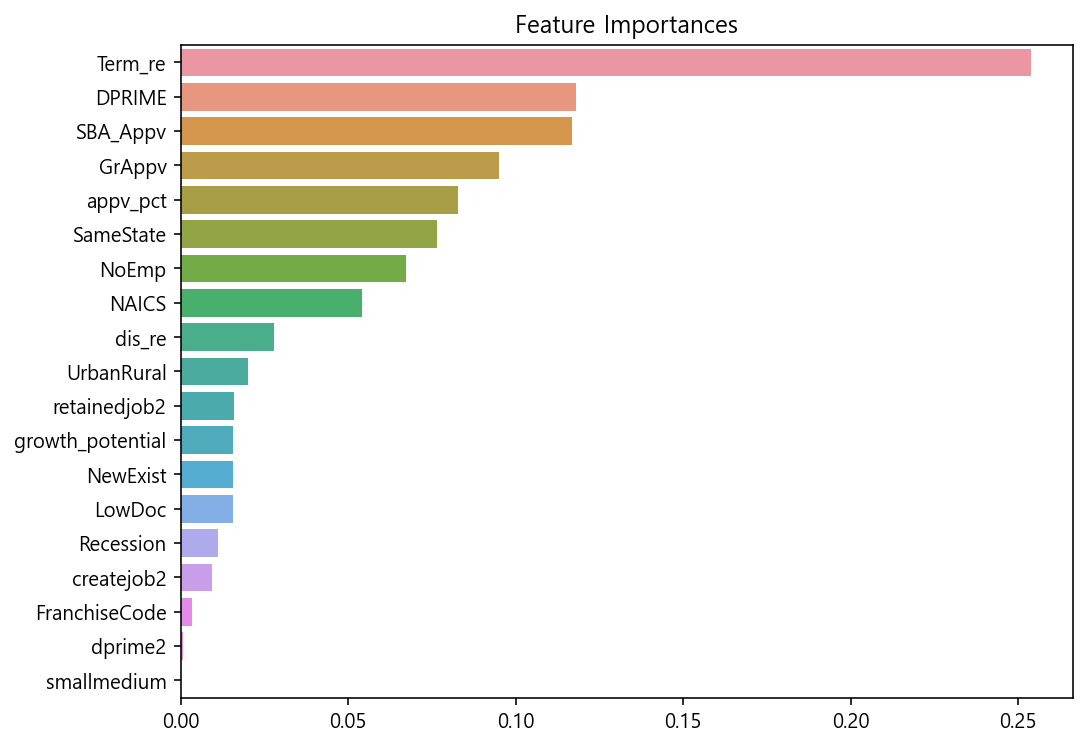

In [35]:
# 변수 중요도 계산

importances_values = pd.Series(ms_model.feature_importances_, index=x_valid.columns).sort_values(ascending=False)

# 변수 중요도 시각화

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=importances_values, y=importances_values.index)
plt.show()

## 3. 서포트 벡터 머신(SVM)
- 전통적인 이진분류 머신러닝 기법
- 과적합을 피할 수 있음
- 데이터셋이 작아도 가능

### 3.1 기본 모델

In [18]:
# 모델 선언
svm_model = svm.SVC(random_state=42)

In [19]:
# 모델 학습
svm_model.fit(x_train, y_train)

SVC(random_state=42)

In [21]:
pred=svm_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[695 321]
 [202 782]]

정확도: 0.7385
정밀도: 0.7748
재현율: 0.6841
F1: 0.7266
              precision    recall  f1-score   support

        True       0.77      0.68      0.73      1016
       False       0.71      0.79      0.75       984

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000



=> f1-score가 약 0.73

### 3.2 하이퍼파라미터 튜닝
- svm 모델에서 특성 중요도는 kernel=linear일 때만 가능
- C : 오류를 얼마나 허용할 것인지 클수록 하드마진, 작을수록 소프트마진에 가까움
- kernel : rbf(가우시안 커널), linear, poly, sigmoid, precomputed
- degree : 다항식 커널의 차수 결정(default=3)
- gamma : 결정경계를 얼마나 유연하게 그릴지 결정함. 클수록 오버피팅 발생 가능성 높아짐(default='scale')
- coef0 : 다항식 커널에 있는 상수항 r(default=0.0)

kernel='linear'

In [22]:
# 모델 선언
svm_model = svm.SVC(random_state=42, kernel='linear')

# 모델 학습
svm_model.fit(x_train, y_train)

# 모델 평가
pred=svm_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[703 313]
 [237 747]]

정확도: 0.7250
정밀도: 0.7479
재현율: 0.6919
F1: 0.7188
              precision    recall  f1-score   support

        True       0.75      0.69      0.72      1016
       False       0.70      0.76      0.73       984

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.72      2000
weighted avg       0.73      0.72      0.72      2000



GridSearch

In [23]:
# SVM 모델 정의
svm_model = svm.SVC(random_state=42)

# 그리드 서치를 위한 하이퍼파라미터 후보군 설정
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# 그리드 서치 수행
grid_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [34]:
# 최적 하이퍼파라미터를 사용한 모델 정의
gs_model = svm.SVC(random_state=42, C=10, kernel='rbf', gamma='auto')

# 모델 학습
gs_model.fit(x_train, y_train)

# 모델 평가
pred = gs_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[715 301]
 [180 804]]

정확도: 0.7595
정밀도: 0.7989
재현율: 0.7037
F1: 0.7483
              precision    recall  f1-score   support

        True       0.80      0.70      0.75      1016
       False       0.73      0.82      0.77       984

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



=> f1-score가 0.7483으로, 가장 높은 수치를 보여줌.

Manual Search를 통해 수동으로 하이퍼파라미터 조정하기

In [28]:
#모델 정의
ms_model = svm.SVC(random_state=42, C=9, kernel='rbf', gamma='auto')

# 모델 학습
ms_model.fit(x_train, y_train)

# 모델 평가
pred = ms_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[712 304]
 [180 804]]

정확도: 0.7580
정밀도: 0.7982
재현율: 0.7008
F1: 0.7463
              precision    recall  f1-score   support

        True       0.80      0.70      0.75      1016
       False       0.73      0.82      0.77       984

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



In [29]:
#모델 정의
ms_model = svm.SVC(random_state=42, C=8, kernel='rbf', gamma='auto')

# 모델 학습
ms_model.fit(x_train, y_train)

# 모델 평가
pred = ms_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[710 306]
 [183 801]]

정확도: 0.7555
정밀도: 0.7951
재현율: 0.6988
F1: 0.7438
              precision    recall  f1-score   support

        True       0.80      0.70      0.74      1016
       False       0.72      0.81      0.77       984

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.75      2000
weighted avg       0.76      0.76      0.75      2000



In [32]:
#모델 정의
ms_model = svm.SVC(random_state=42, C=10, kernel='rbf', gamma=0.1)

# 모델 학습
ms_model.fit(x_train, y_train)

# 모델 평가
pred = ms_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[719 297]
 [189 795]]

정확도: 0.7570
정밀도: 0.7919
재현율: 0.7077
F1: 0.7474
              precision    recall  f1-score   support

        True       0.79      0.71      0.75      1016
       False       0.73      0.81      0.77       984

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



In [33]:
#모델 정의
ms_model = svm.SVC(random_state=42, C=10, kernel='rbf', gamma=0.5)

# 모델 학습
ms_model.fit(x_train, y_train)

# 모델 평가
pred = ms_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[732 284]
 [257 727]]

정확도: 0.7295
정밀도: 0.7401
재현율: 0.7205
F1: 0.7302
              precision    recall  f1-score   support

        True       0.74      0.72      0.73      1016
       False       0.72      0.74      0.73       984

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



Grid Search로 찾은 모델의 f1-score가 가장 높으므로, gs_model로 추후 분석 진행!

## 3.3 시각화

ROC 곡선

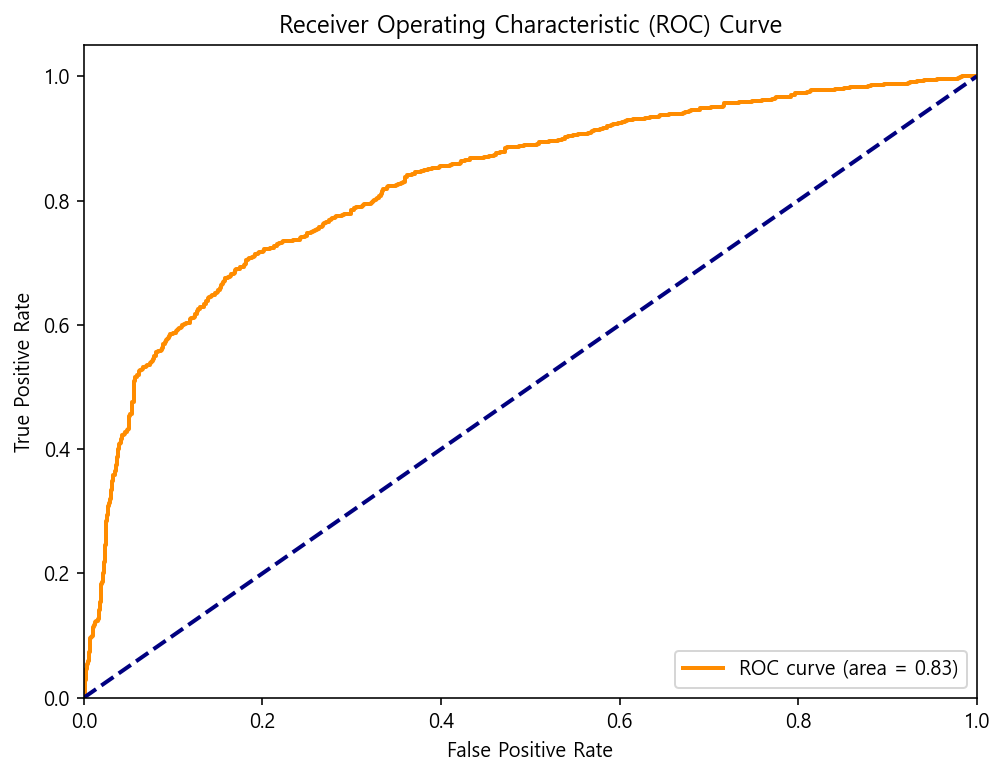

In [38]:
# 예측된 확률 계산
probs = gs_model.decision_function(x_valid)

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_valid, probs)
roc_auc = auc(fpr, tpr)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

=> AUC = 0.83

## 4. XGBoost

### 4.1 기본 모델

In [53]:
# 모델 선언
xg_model = XGBClassifier(random_state=42)

In [54]:
# 모델 학습
xg_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [55]:
# 모델 평가
pred=xg_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[754 262]
 [208 776]]

정확도: 0.7650
정밀도: 0.7838
재현율: 0.7421
F1: 0.7624
              precision    recall  f1-score   support

        True       0.78      0.74      0.76      1016
       False       0.75      0.79      0.77       984

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.76      2000
weighted avg       0.77      0.77      0.76      2000



### 4.2 하이퍼파라미터 튜닝

Grid Search는 너무 오래 걸리므로, Manual Search 진행


    'learning_rate': [0.01, 0.1, 0.2],                # 학습률
    'n_estimators': [100, 200, 300],                  # 트리의 개수
    'max_depth': [3, 4, 5],                           # 트리의 최대 깊이
    'subsample': [0.8, 0.9, 1.0],                     # 트리를 훈련하는 데 사용되는 샘플 비율
    'colsample_bytree': [0.8, 0.9, 1.0],              # 각 트리마다 사용되는 특성(feature)의 비율
    'gamma': [0, 0.1, 0.2],                           # 분할을 위한 최소 손실 감소
    'reg_alpha': [0, 0.1, 0.2],                       # L1 규제
    'reg_lambda': [0, 0.1, 0.2]                       # L2 규제


In [57]:
#모델 정의
ms_model = XGBClassifier(random_state=42, learning_rate=0.1, n_estimators=100, max_depth=3, subsample=0.8, colsample_bytree=0.8,
                        gamma=0, reg_alpha=0, reg_lambda=0)

# 모델 학습
ms_model.fit(x_train, y_train)

# 모델 평가
pred = ms_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[738 278]
 [177 807]]

정확도: 0.7725
정밀도: 0.8066
재현율: 0.7264
F1: 0.7644
              precision    recall  f1-score   support

        True       0.81      0.73      0.76      1016
       False       0.74      0.82      0.78       984

    accuracy                           0.77      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.78      0.77      0.77      2000



In [60]:
#모델 정의
ms_model = XGBClassifier(random_state=42, learning_rate=0.2, n_estimators=100, max_depth=3, subsample=0.8, colsample_bytree=0.8,
                        gamma=0, reg_alpha=0, reg_lambda=0)

# 모델 학습
ms_model.fit(x_train, y_train)

# 모델 평가
pred = ms_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[759 257]
 [186 798]]

정확도: 0.7785
정밀도: 0.8032
재현율: 0.7470
F1: 0.7741
              precision    recall  f1-score   support

        True       0.80      0.75      0.77      1016
       False       0.76      0.81      0.78       984

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000



In [67]:
#모델 정의
ms_model = XGBClassifier(random_state=42, learning_rate=0.2, n_estimators=100, max_depth=3, subsample=0.8, colsample_bytree=0.9,
                        gamma=0.1, reg_alpha=0, reg_lambda=0)

# 모델 학습
ms_model.fit(x_train, y_train)

# 모델 평가
pred = ms_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[768 248]
 [195 789]]

정확도: 0.7785
정밀도: 0.7975
재현율: 0.7559
F1: 0.7761
              precision    recall  f1-score   support

        True       0.80      0.76      0.78      1016
       False       0.76      0.80      0.78       984

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000



In [70]:
#모델 정의
ms_model = XGBClassifier(random_state=42, learning_rate=0.2, n_estimators=100, max_depth=3, subsample=0.8, colsample_bytree=0.9,
                        gamma=0, reg_alpha=0, reg_lambda=0)

# 모델 학습
ms_model.fit(x_train, y_train)

# 모델 평가
pred = ms_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[768 248]
 [195 789]]

정확도: 0.7785
정밀도: 0.7975
재현율: 0.7559
F1: 0.7761
              precision    recall  f1-score   support

        True       0.80      0.76      0.78      1016
       False       0.76      0.80      0.78       984

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000



### 4.3 변수 중요도

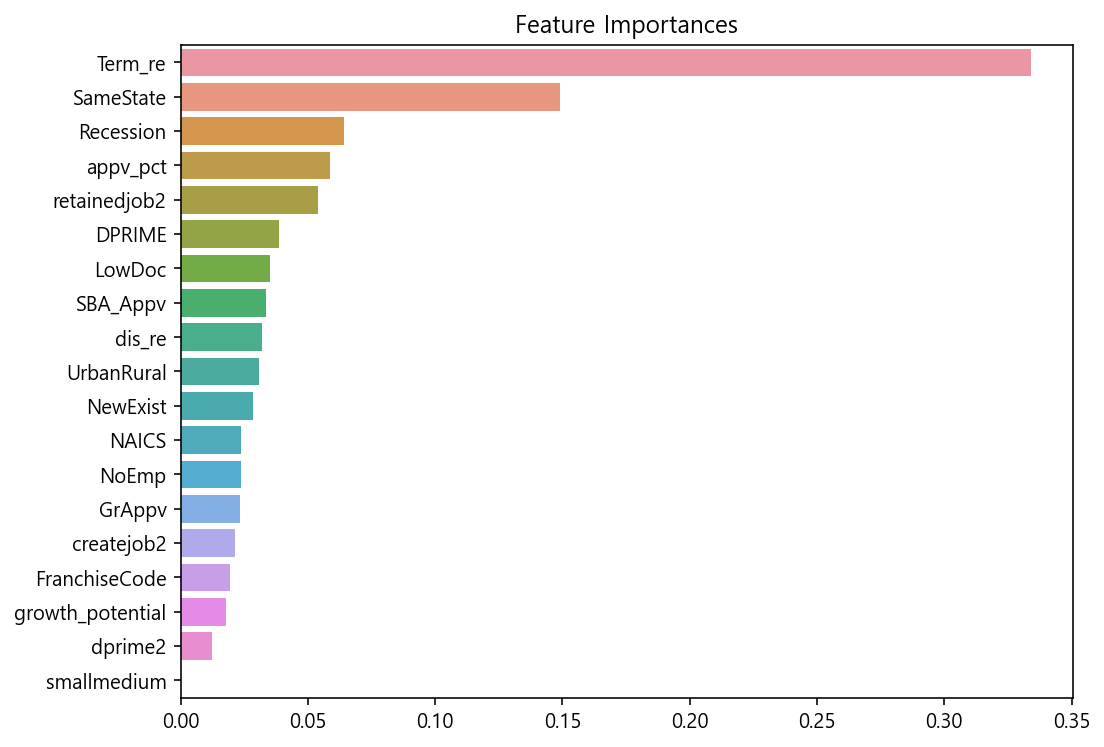

In [71]:
# 변수 중요도 계산

importances_values = pd.Series(ms_model.feature_importances_, index=x_valid.columns).sort_values(ascending=False)

# 변수 중요도 시각화

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=importances_values, y=importances_values.index)
plt.show()

- 로지스틱 : 0.6122
- 랜덤 포레스트 : 0.7747
- SVM : 0.7483
- XGBoost : 0.7761